In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
#load datsets
df=pd.read_csv("C:\\Users\\HP\\Downloads\\yellow_tripdata_2020-09.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed:_0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,0,1.0,2020-09-01 07:37:32,2020-09-01 07:42:12,1.0,0.90,1.0,N,140,262,1.0,5.5,2.5,0.5,1.75,0.0,0.3,10.55,2.5
1,1,1,2.0,2020-09-01 07:47:57,2020-09-01 07:52:30,1.0,0.87,1.0,N,48,230,1.0,5.5,0.0,0.5,1.20,0.0,0.3,10.00,2.5
2,2,2,2.0,2020-09-01 09:02:30,2020-09-01 09:14:01,1.0,2.33,1.0,N,238,43,2.0,11.0,0.0,0.5,0.00,0.0,0.3,14.30,2.5
3,3,3,1.0,2020-09-01 09:00:28,2020-09-01 09:07:20,1.0,1.30,1.0,N,142,163,1.0,7.0,2.5,0.5,2.00,0.0,0.3,12.30,2.5
4,4,4,2.0,2020-09-01 10:55:27,2020-09-01 11:06:12,1.0,4.93,1.0,N,88,170,1.0,15.5,0.0,0.5,2.50,0.0,0.3,21.30,2.5


In [4]:
#Exploratray Data analysis
df.shape

(998, 20)

In [5]:
df.dtypes

Unnamed: 0                 int64
Unnamed:_0                 int64
VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

In [7]:
df["duration"]=df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]
df["duration"].dt.total_seconds()/60

0       4.666667
1       4.550000
2      11.516667
3       6.866667
4      10.750000
         ...    
993    22.000000
994    10.000000
995    -0.483333
996    25.100000
997    12.000000
Name: duration, Length: 998, dtype: float64

In [8]:
#filtering data
df=df[["passenger_count","payment_type","fare_amount","trip_distance","duration"]]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,5.50,0.90,0 days 00:04:40
1,1.0,1.0,5.50,0.87,0 days 00:04:33
2,1.0,2.0,11.00,2.33,0 days 00:11:31
3,1.0,1.0,7.00,1.30,0 days 00:06:52
4,1.0,1.0,15.50,4.93,0 days 00:10:45
...,...,...,...,...,...
993,NaN,NaN,25.98,9.54,0 days 00:22:00
994,NaN,NaN,11.45,1.35,0 days 00:10:00
995,NaN,NaN,17.02,4.04,-1 days +23:59:31
996,NaN,NaN,33.52,6.38,0 days 00:25:06


In [9]:
#check missing value
df.isnull().sum()

passenger_count    69
payment_type       69
fare_amount         0
trip_distance       0
duration            0
dtype: int64

In [10]:
(69/len(df)*100)

6.913827655310621

In [11]:
df.dropna(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,5.5,0.90,0 days 00:04:40
1,1.0,1.0,5.5,0.87,0 days 00:04:33
2,1.0,2.0,11.0,2.33,0 days 00:11:31
3,1.0,1.0,7.0,1.30,0 days 00:06:52
4,1.0,1.0,15.5,4.93,0 days 00:10:45
...,...,...,...,...,...
924,4.0,2.0,12.5,3.00,0 days 00:15:17
925,1.0,2.0,8.5,1.98,0 days 00:07:35
926,1.0,1.0,5.0,0.91,0 days 00:03:42
927,1.0,1.0,11.0,3.15,0 days 00:09:27


In [12]:
df["passenger_count"]=df["passenger_count"].astype("int64")
df["payment_type"]=df["payment_type"].astype("int64")

In [13]:
df[df.duplicated()]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,5.5,0.90,0 days 00:04:40
1,1,1,5.5,0.87,0 days 00:04:33
2,1,2,11.0,2.33,0 days 00:11:31
3,1,1,7.0,1.30,0 days 00:06:52
4,1,1,15.5,4.93,0 days 00:10:45
...,...,...,...,...,...
924,4,2,12.5,3.00,0 days 00:15:17
925,1,2,8.5,1.98,0 days 00:07:35
926,1,1,5.0,0.91,0 days 00:03:42
927,1,1,11.0,3.15,0 days 00:09:27


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
#data distribution or contribution
df["passenger_count"].value_counts(normalize=True)

passenger_count
1    0.750000
2    0.140086
3    0.029095
5    0.026940
4    0.020474
6    0.020474
0    0.012931
Name: proportion, dtype: float64

In [16]:
df["payment_type"].value_counts(normalize=True)

payment_type
1    0.712284
2    0.275862
3    0.008621
4    0.003233
Name: proportion, dtype: float64

In [17]:
df=df[df["payment_type"]<3]
df=df[(df["passenger_count"]>0)&(df["passenger_count"]<6)]

In [18]:
df.shape

(887, 5)

In [19]:
df["payment_type"].replace([1,2],['Card','Cash'], inplace = True)

In [20]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,887.000000,887.000000,887.000000,887
mean,1.379932,10.657272,2.431172,0 days 00:19:22.277339346
std,0.870227,8.501169,2.858909,0 days 01:42:20.360185295
min,1.000000,-4.000000,0.000000,0 days 00:00:00
25%,1.000000,6.000000,0.980000,0 days 00:05:41.500000
50%,1.000000,8.500000,1.600000,0 days 00:09:01
75%,1.000000,12.000000,2.700000,0 days 00:13:48
max,5.000000,100.000000,27.330000,0 days 23:38:53


In [21]:
df=df[df["passenger_count"]>0]
df=df[df["fare_amount"]>0]
df=df[df["trip_distance"]>0]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,5.5,0.90,0 days 00:04:40
1,1,Card,5.5,0.87,0 days 00:04:33
2,1,Cash,11.0,2.33,0 days 00:11:31
3,1,Card,7.0,1.30,0 days 00:06:52
4,1,Card,15.5,4.93,0 days 00:10:45
...,...,...,...,...,...
924,4,Cash,12.5,3.00,0 days 00:15:17
925,1,Cash,8.5,1.98,0 days 00:07:35
926,1,Card,5.0,0.91,0 days 00:03:42
927,1,Card,11.0,3.15,0 days 00:09:27


{'whiskers': [<matplotlib.lines.Line2D at 0x19b6d7e0680>,
 'caps': [<matplotlib.lines.Line2D at 0x19b6d7e0c80>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b6d7961e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19b6d7e11c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b6d7e1460>],
 'means': []}

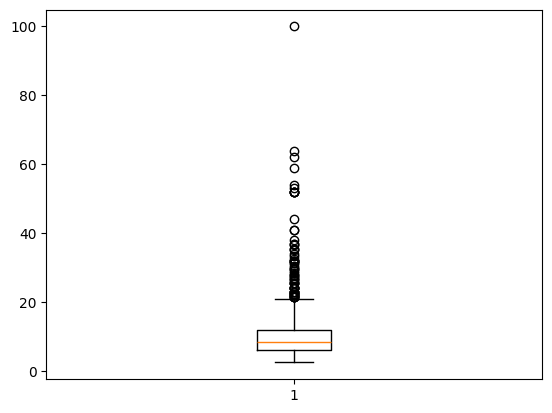

In [22]:
#before outliers
plt.boxplot(df["fare_amount"])

In [23]:
#using IQR 
for col in ['fare_amount','trip_distance','duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,5.5,0.90,0 days 00:04:40
1,1,Card,5.5,0.87,0 days 00:04:33
2,1,Cash,11.0,2.33,0 days 00:11:31
3,1,Card,7.0,1.30,0 days 00:06:52
5,1,Card,8.0,1.61,0 days 00:09:19
...,...,...,...,...,...
924,4,Cash,12.5,3.00,0 days 00:15:17
925,1,Cash,8.5,1.98,0 days 00:07:35
926,1,Card,5.0,0.91,0 days 00:03:42
927,1,Card,11.0,3.15,0 days 00:09:27


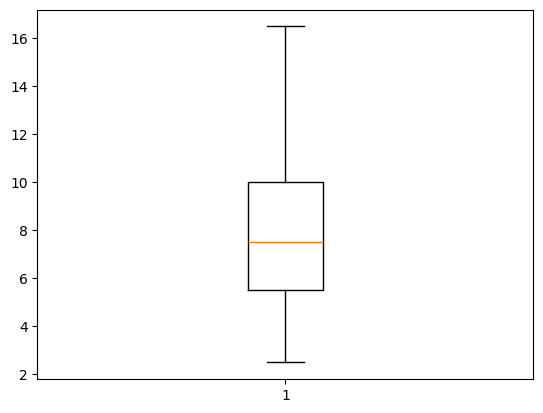

In [24]:
#After outliers
plt.boxplot(df["fare_amount"])
plt.show()

4.Journey Insights:

• Customers paying with cards tend to have a slightly higher average trip distance and fare amount compared to those paying with cash.

• Indicates that customers prefers to pay more with cards when they have high fare amount and long trip distance.

<function matplotlib.pyplot.show(close=None, block=None)>

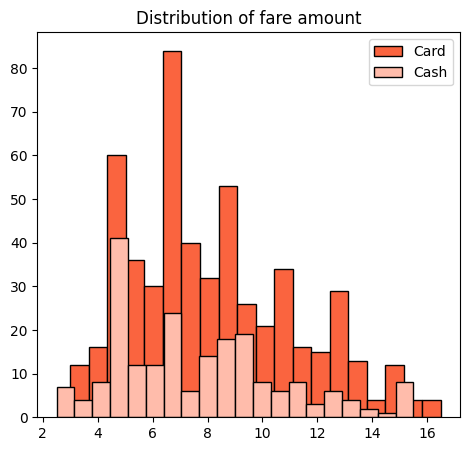

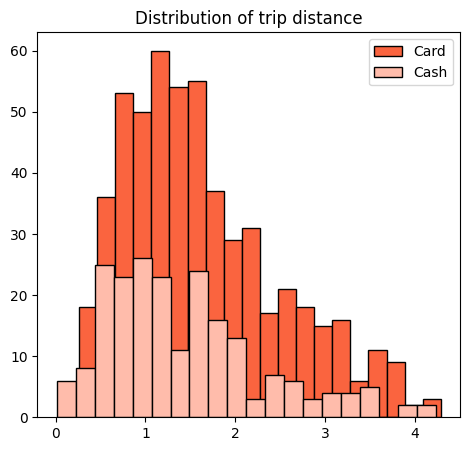

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of fare amount")
plt.hist(df[df["payment_type"]=="Card"]["fare_amount"],histtype="barstacked",bins=20,edgecolor="k",color="#FA643F",label="Card")
plt.hist(df[df["payment_type"]=="Cash"]["fare_amount"],histtype="barstacked",bins=20,edgecolor="k",color="#FFBCAB",label="Cash")
plt.legend()
plt.show
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of trip distance")
plt.hist(df[df["payment_type"]=="Card"]["trip_distance"],histtype="barstacked",bins=20,edgecolor="k",color="#FA643F",label="Card")
plt.hist(df[df["payment_type"]=="Cash"]["trip_distance"],histtype="barstacked",bins=20,edgecolor="k",color="#FFBCAB",label="Cash")
plt.legend()
plt.show

In [26]:
#using groupby
df.groupby("payment_type").agg({"fare_amount":["mean","std"],"trip_distance":["mean","std"]})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            8.222736  2.950804       1.64000  0.872649
Cash            7.613744  3.059933       1.44327  0.877703

5.Preference of Payment Types:

• The proportion of customers paying with cards is significantly higher than those paying with cash, with card payments accounting for 67.5% of all transactions compared to cash payments at 32.5%. 

• This indicates a strong preference among customers for using card payments over cash, potentially due to convenience, security, or incentives offered for card transactions.

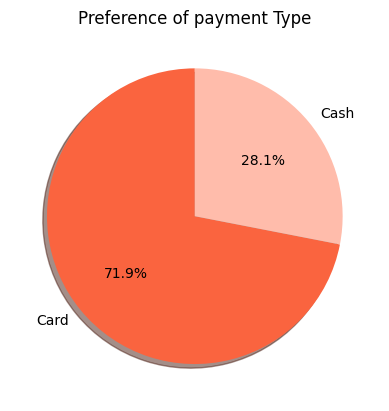

In [27]:
plt.title("Preference of payment Type")
plt.pie(df["payment_type"].value_counts(normalize=True),labels = df["payment_type"].value_counts().index,
       startangle=90,shadow=True,autopct="%1.1f%%",colors=["#FA643F","#FFBCAB"])
plt.show()

In [28]:
passenger_count=df.groupby(["payment_type","passenger_count"])[["passenger_count"]].count()
passenger_count.rename(columns = {"passenger_count":"count"},inplace=True)
passenger_count.reset_index(inplace=True)

In [29]:
passenger_count["perc"] = (passenger_count["count"]/passenger_count["count"].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,417,55.452128
1,Card,2,79,10.505319
2,Card,3,20,2.659574
3,Card,4,11,1.462766
4,Card,5,14,1.861702
5,Cash,1,165,21.941489
6,Cash,2,31,4.122340
7,Cash,3,6,0.797872
8,Cash,4,5,0.664894
9,Cash,5,4,0.531915


In [30]:
df=pd.DataFrame(columns=["payment_type",1,2,3,4,5])
df["payment_type"]=["Card","Cash"]
df.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df.iloc[1,1:]=passenger_count.iloc[5,-1]
df

,payment_type,1,2,3,4,5
0,Card,55.452128,10.505319,2.659574,1.462766,1.861702
1,Cash,21.941489,21.941489,21.941489,21.941489,21.941489


6.Passenger Count Analysis

• Among card payments, rides with a single passenger (passenger_count = 1) comprise the largest proportion, constituting 40.08% of all card transactions.

• Similarly, cash payments are predominantly associated with single-passenger rides, making up 20.04% of all cash transactions.

• There is a noticeable decrease in the percentage of transactions as the passenger count increases, suggesting that larger groups are less likely to use taxis or may opt for alternative payment methods.

• These insights emphasize the importance of considering both payment method and passenger count when analyzing transaction data, as they provide valuable insights into customer behavior and preferences.

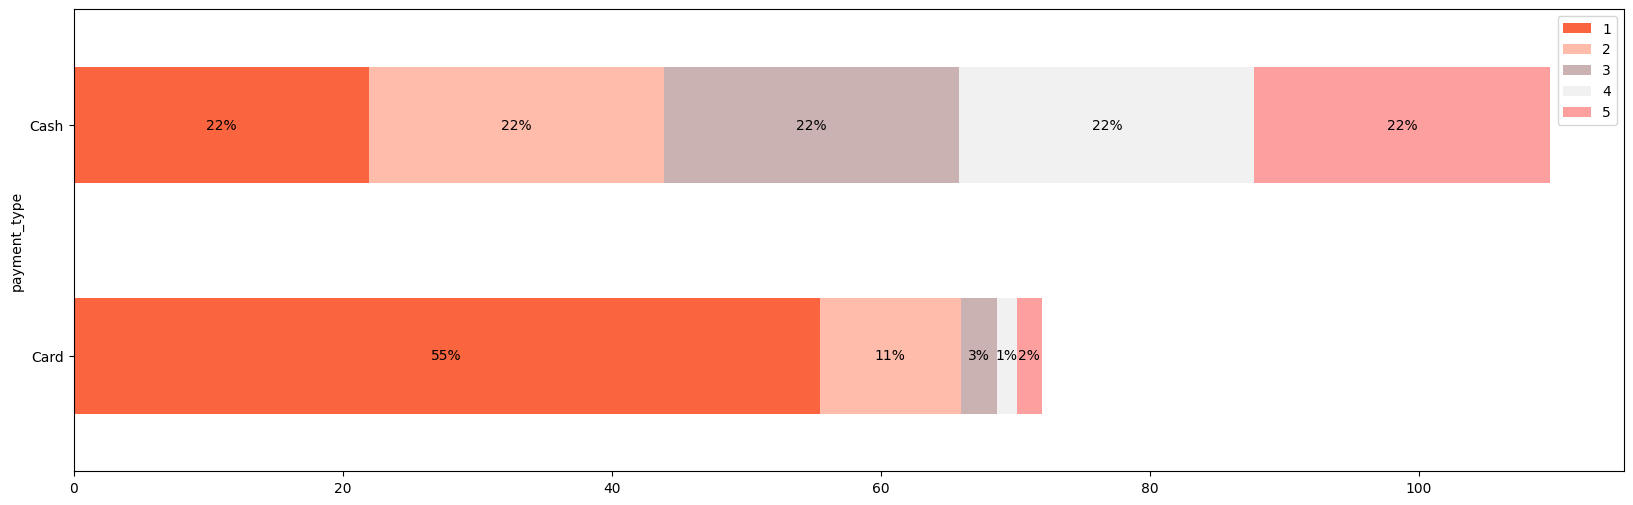

In [31]:
fig,ax = plt.subplots(figsize=(20,6))
df.plot(x="payment_type",kind="barh",stacked = True,ax=ax,color= ["#FA643F" ,"#FFBCAB","#CBB2B2","#F1F1F1","#FD9F9F"])
#Add percentage text
for p in ax.patches:
    width = p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,
            y+ height/2,
            "{:.0f}%".format(width),
             horizontalalignment="center",
             verticalalignment="center")